In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\lenovo\\Downloads\\retail_sales_dataset.csv")
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [3]:
#Dataset Overview
#Explore the dataset's basic structure (columns, rows, types)
df.shape

(1000, 9)

In [4]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [5]:
df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [6]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [7]:
#Dataset Overview and Preparation
#Identify missing values and basic data characteristics.

df.isna()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False


In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

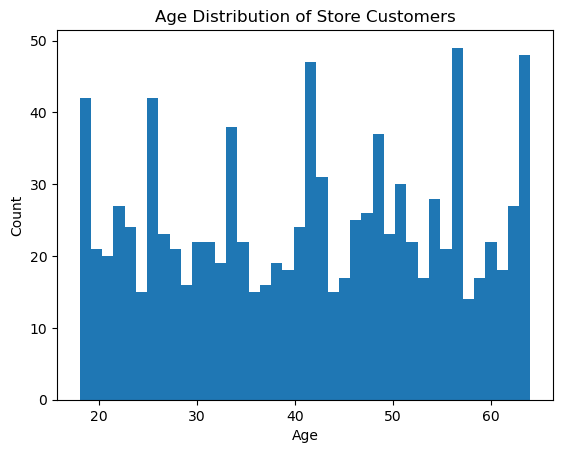

In [9]:
#Basic Data Visualization
#Create simple charts (bar, line) to understand data distribution.

ax = df['Age'].plot(kind='hist' , bins= 40, title='Age Distribution of Store Customers')
_ = ax.set_xlabel('Age')
_ = ax.set_ylabel('Count')

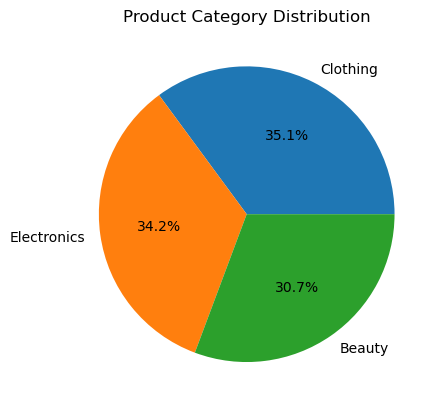

In [10]:
### Customers ranged from 18-64 years old (mean age 41.39 years old)
# Count the frequency of each category
category_counts = df['Product Category'].value_counts()

# Create pie chart
ax = category_counts.plot(kind='pie', autopct='%1.1f%%', title='Product Category Distribution')
_ = ax.set_ylabel(None)

<Figure size 1000x600 with 0 Axes>

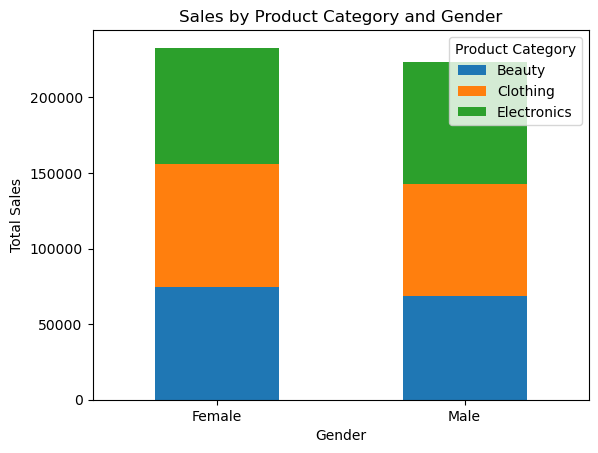

In [11]:
###Product preferences by gender###

# Aggregate sales by gender and product category
gender_category_sales = df.groupby(['Gender', 'Product Category'])['Total Amount'].sum().unstack()

# Plot
plt.figure(figsize=(10, 6))
gender_category_sales.plot(kind='bar', stacked=True)
plt.title('Sales by Product Category and Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

(array([0, 1, 2]),
 [Text(0, 0, 'Beauty'), Text(1, 0, 'Clothing'), Text(2, 0, 'Electronics')])

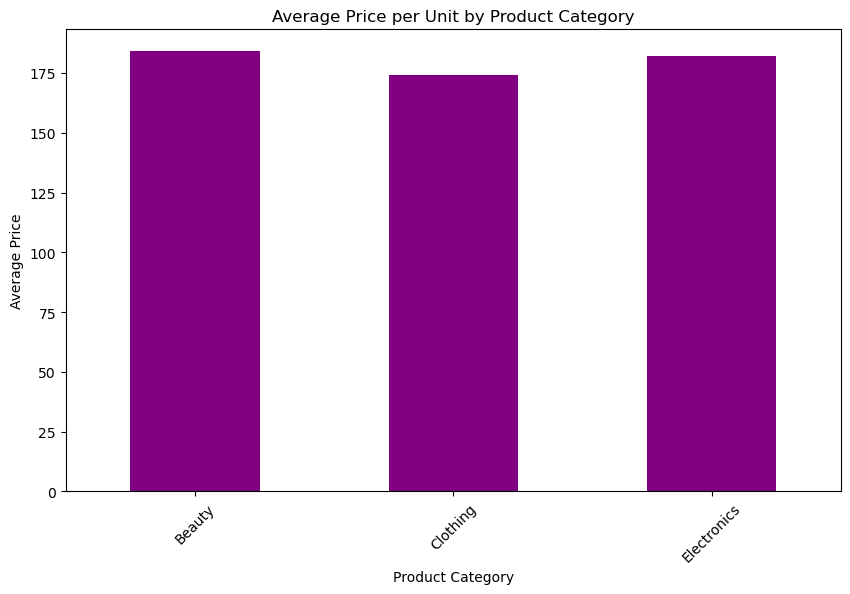

In [12]:
avg_price_by_category = df.groupby('Product Category')['Price per Unit'].mean()

# Plot
plt.figure(figsize=(10, 6))
avg_price_by_category.plot(kind='bar', color='purple')
plt.title('Average Price per Unit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'Beauty'), Text(1, 0, 'Clothing'), Text(2, 0, 'Electronics')])

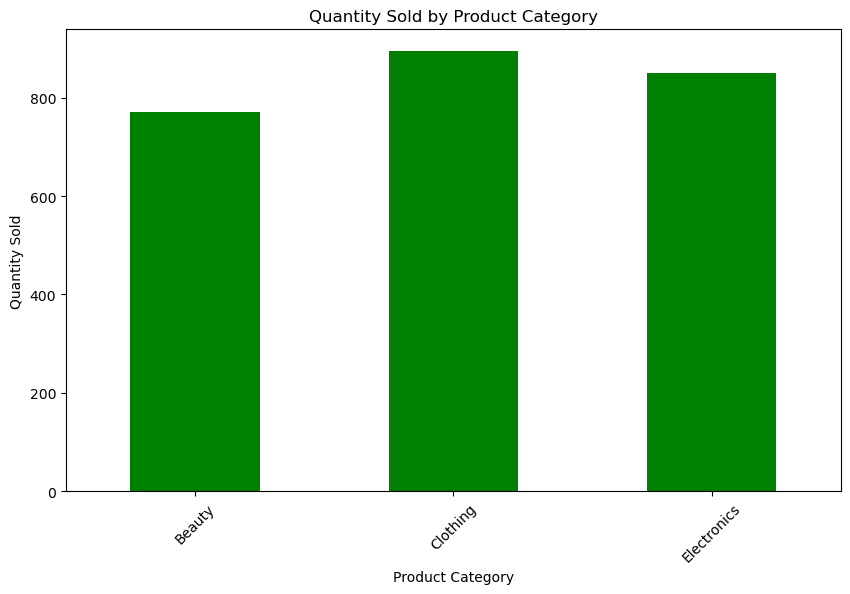

In [13]:
quantity_by_category = df.groupby('Product Category')['Quantity'].sum()

# Plot
plt.figure(figsize=(10, 6))
quantity_by_category.plot(kind='bar', color='green')
plt.title('Quantity Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'Beauty'), Text(1, 0, 'Clothing'), Text(2, 0, 'Electronics')])

<Figure size 1200x800 with 0 Axes>

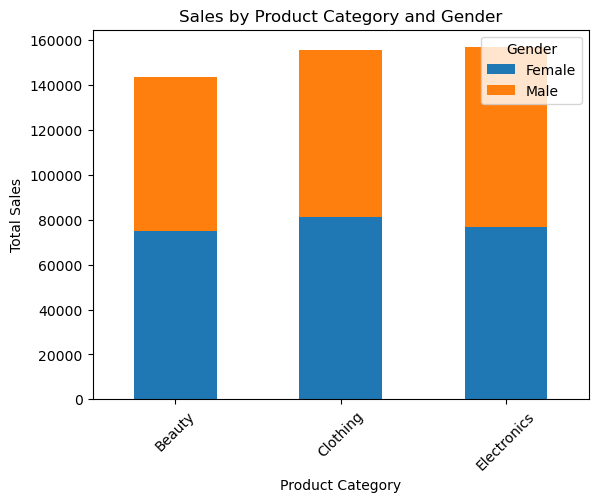

In [14]:
##Product Category Popularity by Gender

category_gender_sales = df.groupby(['Product Category', 'Gender'])['Total Amount'].sum().unstack()

# Plot
plt.figure(figsize=(12, 8))
category_gender_sales.plot(kind='bar', stacked=True)
plt.title('Sales by Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_536\2987595965.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


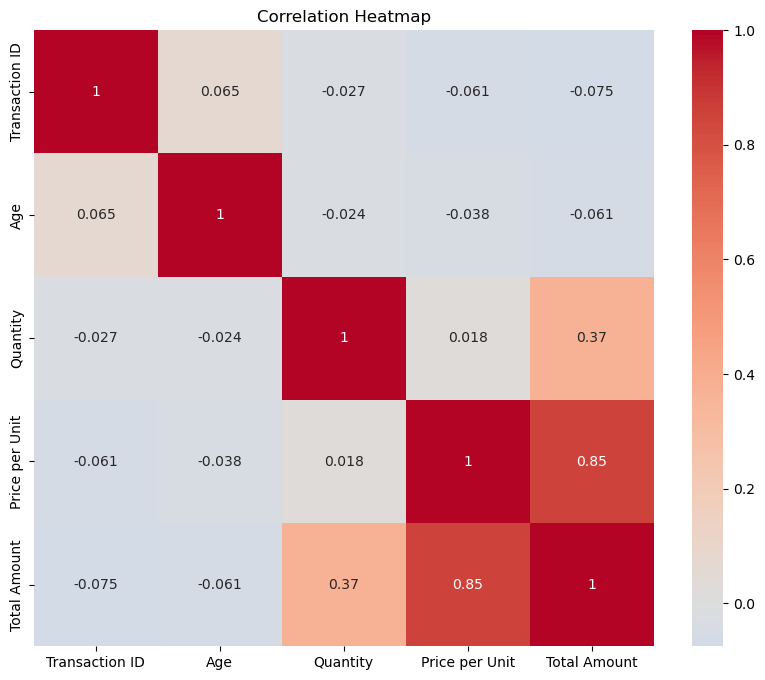

In [15]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()